In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
cities_df = pd.DataFrame(cities, columns=["Cities"])
cities_df.to_csv('output_data/cities.csv', index=True)

In [4]:
#create URL, units, and empty lists to hold data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_data = []

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Parameters to look for: ["name"],["sys"]["country"],["clouds"]["all"],["dt"](remember to convert from UNICODE,
#["main"]["humidity"],["main"]["temp_max"], ["coord"]["lat"],["coord"]["lon"],["Wind"]["Speed"].

for city in cities: 
    response = requests.get(query_url + city).json()
    time.sleep(1.01)
    try:
        weather_data.append({'City': response['name'],
                             'Country': response['sys']['country'],
                             'Cloudiness': response['clouds']['all'],
                             'Date': time.strftime("%b %d, %Y", time.localtime(int(response['dt']))),
                             'Humidity': response['main']['humidity'],
                             'Lat': response['coord']['lat'],
                             'Lng': response['coord']['lon'], 
                             'Max Temp': response['main']['temp_max'],
                             'Wind Speed': response['wind']['speed']
                             })
    except KeyError:
        pass
weather_df = pd.DataFrame(weather_data)
weather_df.to_csv('output_data/weather_data.csv')
weather_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,100,AU,"Jun 05, 2019",16,-33.64,115.35,66.0,37.92
1,Ushuaia,0,AR,"Jun 05, 2019",75,-54.81,-68.31,41.0,8.39
2,Mataura,87,NZ,"Jun 05, 2019",83,-46.19,168.86,41.0,9.91
3,Thompson,75,CA,"Jun 05, 2019",67,55.74,-97.86,59.0,2.24
4,Kahului,40,US,"Jun 05, 2019",43,20.89,-156.47,91.4,13.87


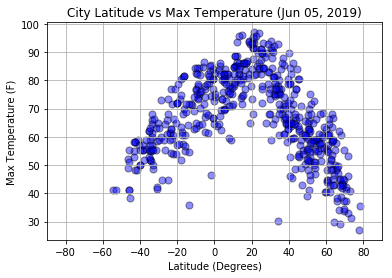

In [6]:
weather_df.plot.scatter('Lat', 
                       'Max Temp', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       alpha= .45,
                       color='Blue', 
                       edgecolor='black', 
                       grid=True)
plt.title('City Latitude vs Max Temperature ('+ weather_df.Date[1] +')')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (F)')

plt.savefig('output_data/lat_v_max_temp.png')

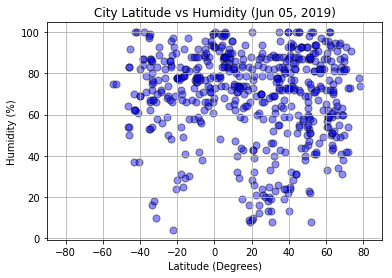

In [7]:
weather_df.plot.scatter('Lat', 
                       'Humidity', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       alpha= .45,
                       color='Blue', 
                       edgecolor='black', 
                       grid=True)
plt.title('City Latitude vs Humidity ('+ weather_df.Date[1] +')')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity (%)')

plt.savefig('output_data/lat_v_humidity.png')

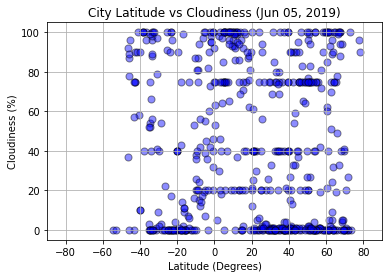

In [8]:
weather_df.plot.scatter('Lat', 
                       'Cloudiness', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       alpha= .45,
                       color='Blue', 
                       edgecolor='black', 
                       grid=True)
plt.title('City Latitude vs Cloudiness ('+ weather_df.Date[1] +')')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness (%)')


plt.savefig('output_data/lat_v_cloudiness.png')

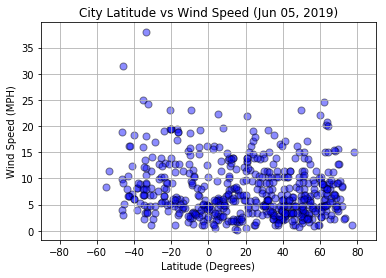

In [9]:
weather_df.plot.scatter('Lat', 
                       'Wind Speed', 
                       marker='o', 
                       s=50,
                       xlim=[-90, 90],
                       alpha= .45,
                       color='Blue', 
                       edgecolor='black', 
                       grid=True)
plt.title('City Latitude vs Wind Speed ('+ weather_df.Date[1] +')')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed (MPH)')

plt.savefig('output_data/lat_v_wind_speed.png')

# Observable trends

## 1. The warmest cities were near 20 degrees north, possibly due to the tilt of the northern hemisphere towards the sun as the summer season approaches. 
## 2. There were some cities with outlier windspeeds around the -40 degree latitude. This could indicate a weather phenomemon, like a storm, at that latitude. 
## 3. More cities than not had a humidity over 50% on June 8, 2019. There was no observable trend between cloudiness and latitude. 
## 4. There were no cities below a latitude of -60 degrees, possibly because there are only a very small number of settlements on Antarctica.